# Accessing Data via yfinance in Python

The Yahoo Finance system allows you to access data in response to queries from Python.  A popular package that does this is *yfinance* which is used in the examples here.

Some boxes on this page are just text - 'Markdown' - but others are Python code.  In the code boxes, any text has to have a '#' in front of it so it is not seen as a command - look for those in the code boxes.  Some of the code here is for you to use if you copy the file to another computer - it can't run in 'Binder' (or Google's 'Colab') hosted code sites.

To run a 'cell' of code, click in the box and then click the Play button.

In [ ]:
pip install yfinance
#Note: you may need to restart the kernel to use packages.  See the Kernel menu tab above.

In [2]:
import pandas as pd
import yfinance as yf
import os
yf.__version__

'0.2.66'

In [3]:
#################################################################
#If code in this module does not work and on your own computer:
#################################################################

#install packages if it looks like they are not there:
pip install yfinance
pip install pandas
pip install seaborn #This is a scientific diagram package but has some very nice graphs in it

# update the yfinance package using command below, and then 
# 'refresh' the Kernel using the menu above


SyntaxError: invalid syntax (4259112952.py, line 7)

In [2]:
#################################################################
#If code in this module does not work and on your own computer:
#################################################################

# update the yfinance package using command below, 
pip install --upgrade yfinance

#and then 
# 'refresh' the Kernel using the menu above
pip install --upgrade pandas
pip install --upgrade seaborn

SyntaxError: invalid syntax (3464215000.py, line 7)

The *yfinance* package accesses financial data directly from Yahoo Finance's database - which has a massive range of data and also analysis.  A lot of this is available directly via the package.  The *pandas* package is used to manipulate data in Python.

(If you see any Python code on the web, it will also usually load a package called *os* - this is just a collection of useful basic functions that already included in base Python.)

We will start by importing some data from Yahoo Finance - which we named 'yf' when we loaded it above - for Apple (using the ticker *AAPL*)

In [8]:
aapl_df = yf.download("AAPL", start='2021-01-06', end='2021-02-21', progress=False)
aapl_df.head(12)  #Print on screen the first 12 observations

C:\Users\james\AppData\Local\Temp\ipykernel_4416\1942989841.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_df = yf.download("AAPL", start='2021-01-06', end='2021-02-21', progress=False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2021-01-06,123.239059,127.570927,123.024899,124.329329,155088000
2021-01-07,127.444374,128.135532,124.465612,124.952339,109578200
2021-01-08,128.544388,129.108992,126.772697,128.914290,105158200
2021-01-11,125.555878,126.714288,125.088625,125.760309,100384500
2021-01-12,125.380630,126.247002,123.492131,125.088592,91951100
2021-01-13,127.415169,127.960300,125.078889,125.341711,88636800
2021-01-14,125.487740,127.522251,125.341713,127.327564,90221800
2021-01-15,123.764725,126.762960,123.628442,125.361186,111598500


It is usually better to make the name of the data into a variable that can be easily changed - so often make a variable called 'symbol' or 'ticker' and then refer to that.

To change the asset you are investigating, simply re-type the line that defines the symbol / ticker variable and then run it again.  (You can also get data on a range of assets in one go as well - see later examples)

In [ ]:
# Fetch historical stock data
symbol = 'AAPL'
stock_data = yf.download(symbol, start='2022-01-01', end='2023-01-01', progress=False)

# Display the first few rows of the dataset
print(stock_data.head())  #print often formats the contents of data objects better for the screen

In [6]:
import datetime as dt  #a useful package for python to understand data formats
symbol="AAPL"
actual_date = dt.date.today()
start_date = actual_date - dt.timedelta(weeks=20)
aapl_df = yf.download(symbol, start=start_date, end=actual_date, progress=False)
aapl_df.head(12)  #Print on screen the first 20 observations

C:\Users\james\AppData\Local\Temp\ipykernel_15656\3145879222.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  aapl_df = yf.download(symbol, start=start_date, end=actual_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-07-03,213.101334,214.199013,211.364984,211.704266,34955800
2025-07-07,209.508896,215.775700,208.361318,212.233156,50229000
2025-07-08,209.568771,210.985786,208.012051,209.658594,42848900
2025-07-09,210.696396,210.885999,206.784634,209.089778,48749400
2025-07-10,211.963745,213.031489,209.588740,210.067728,44443600
2025-07-11,210.716354,211.684318,209.419083,210.127598,39765800
2025-07-14,208.181686,210.466884,207.103954,209.488932,38840100
2025-07-15,208.670670,211.444828,208.481066,208.780439,42296300


### Graphing Data


In [8]:
#Import some packages that can plot data:
import matplotlib.pyplot as plt
import seaborn as sns

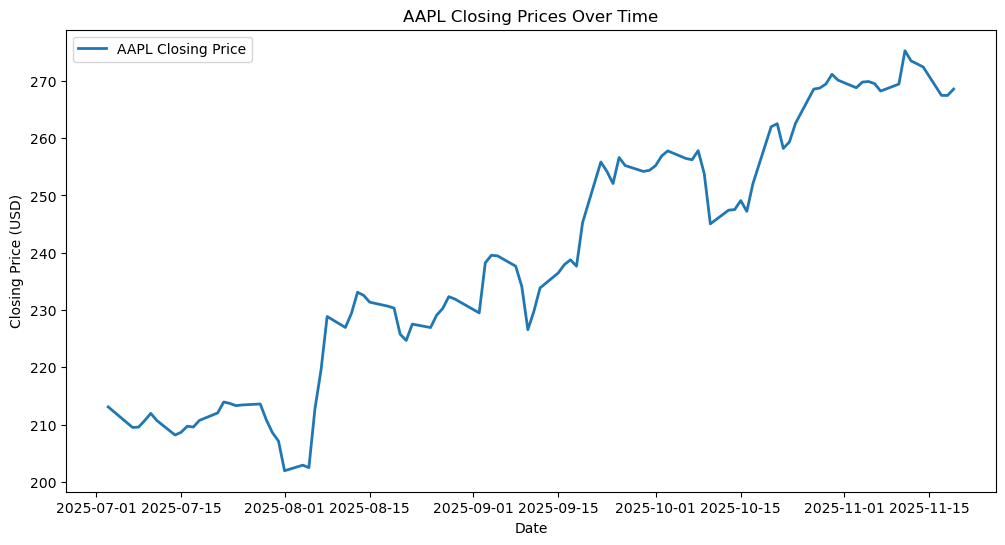

In [9]:
# Line plot of closing prices
plt.figure(figsize=(12, 6))
plt.plot(aapl_df['Close'], label=f'{symbol} Closing Price', linewidth=2)
plt.title(f'{symbol} Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()

In [14]:
#A simple line plot showcasing the closing prices over time, providing a fundamental overview of the stock's performance.
#2. Distribution of Daily Returns

# Seaborn style set
sns.set(style="whitegrid")

symbol = 'AAPL'
stock_data = yf.download(symbol, start='2022-01-01', end='2023-01-01', progress=False)
stock_data.head



C:\Users\james\AppData\Local\Temp\ipykernel_15656\2376498910.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(symbol, start='2022-01-01', end='2023-01-01', progress=False)


<bound method NDFrame.head of Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2022-01-03  178.270309  179.122444  174.058672  174.176201  104487900
2022-01-04  176.007782  179.181217  175.439697  178.877588   99310400
2022-01-05  171.325974  176.468103  171.051728  175.919612   94537600
2022-01-06  168.465973  171.698172  168.113369  169.151587   96904000
2022-01-07  168.632507  170.562032  167.515931  169.337715   86709100
...                ...         ...         ...         ...        ...
2022-12-23  129.900269  130.451943  127.713261  128.974237   63814900
2022-12-27  128.097504  129.456999  126.806975  129.427446   69007800
2022-12-28  124.166786  129.082622  123.999315  127.742834   85438400
2022-12-29  127.683739  128.540804  125.831682  126.087812   75703700
2022-12-30  127.998947  128.018654  125.536110  126.501549  

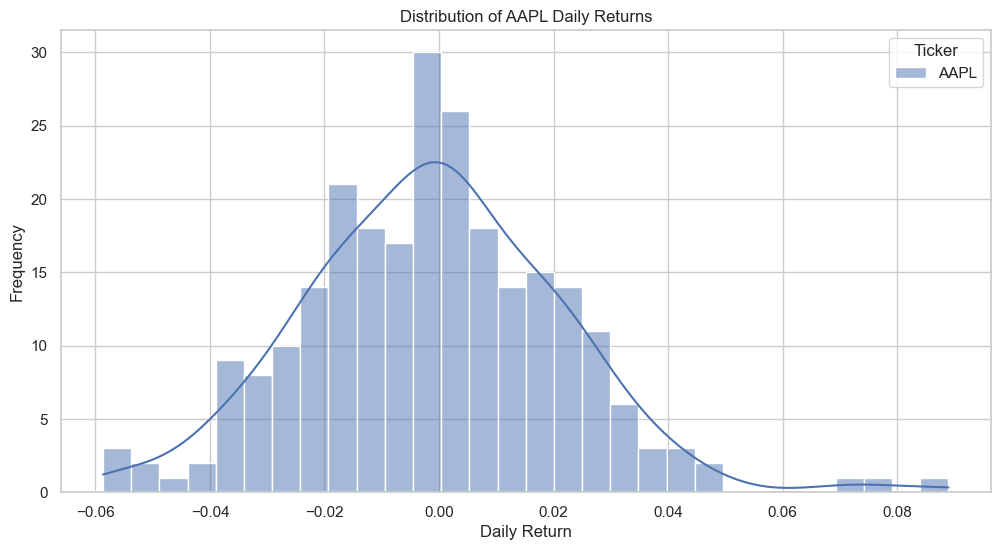

In [15]:
# Distribution of Daily Returns
plt.figure(figsize=(12, 6))
sns.histplot(stock_data['Close'].pct_change().dropna(), bins=30, kde=True, color='blue')
plt.title(f'Distribution of {symbol} Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.show()

<Figure size 1200x600 with 0 Axes>

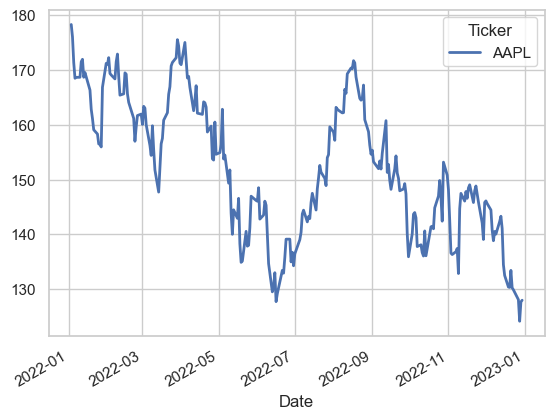

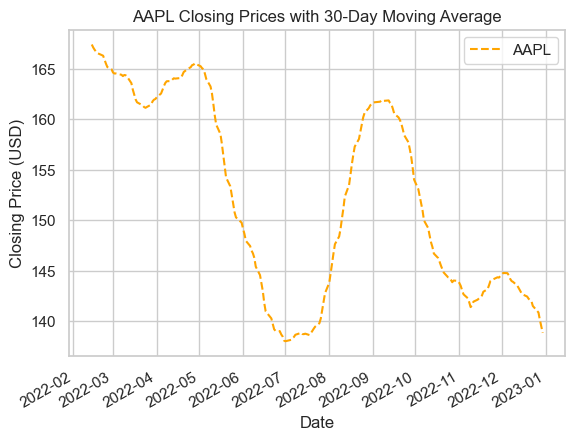

In [18]:
# Moving Average Plot
plt.figure(figsize=(12, 6))
stock_data['Close'].plot(label=f'{symbol} Closing Price', linewidth=2)
stock_data['Close'].rolling(window=30).mean().plot(label=f'{symbol} 30-Day Avg', linestyle='--', color='orange')
plt.title(f'{symbol} Closing Prices with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.show()



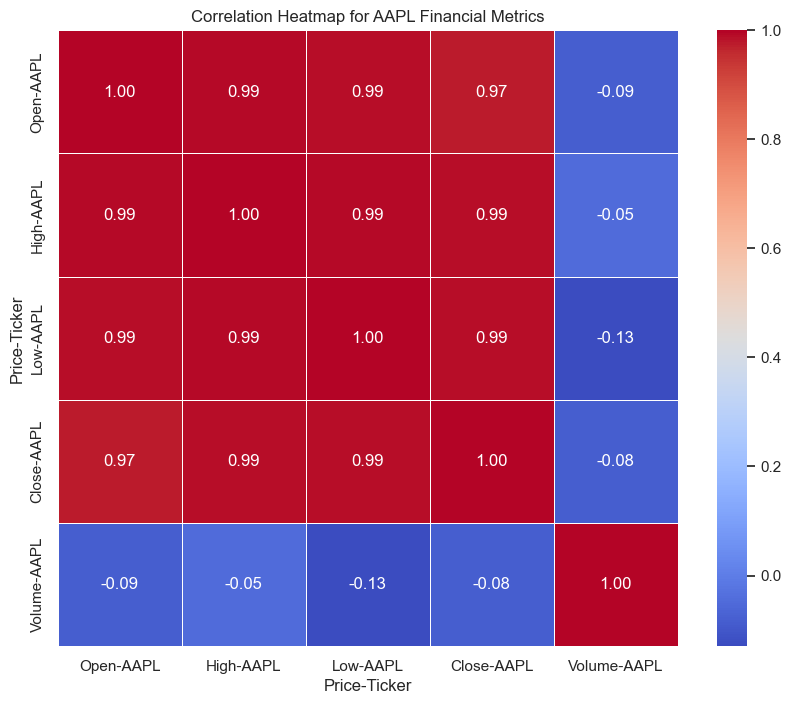

In [26]:

# Correlation Heatmap
correlation_matrix = stock_data[['Open', 'High', 'Low', 'Close', 'Volume']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title(f'Correlation Heatmap for {symbol} Financial Metrics')
plt.show()


And finally - to get an idea of the range of data available...

In [9]:
dat = yf.Ticker("AAPL")
dat.info

{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '(408) 996-1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple Vision Pro, Apple TV, Apple Watch, Beats products, and HomePod, as well as Apple branded and third-party accessories. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download app

In [ ]:
#Find a row that you want to individually call from above and fill in in the quote marks below
dat.info[""]
#e.g. dat.info["forwardEps"]